In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from wordcloud import WordCloud, STOPWORDS
import scipy.stats

### Webscrape the data

In [2]:
url = 'https://www.goodreads.com/list/show/1.Best_Books_Ever'
url2 = 'https://www.goodreads.com/list/show/1.Best_Books_Ever?page=2'
page = requests.get(url) 
page2 = requests.get(url2)
soup = bs(page.content, 'html.parser')
soup2 = bs(page2.content, 'html.parser')
titles = soup.find_all('a', class_='bookTitle')
titles2 = soup2.find_all('a', class_='bookTitle')
authors = soup.find_all('a', class_='authorName')
authors2 = soup2.find_all('a', class_='authorName')
info = soup.find_all('span', class_='minirating')
info2 = soup2.find_all('span', class_='minirating')



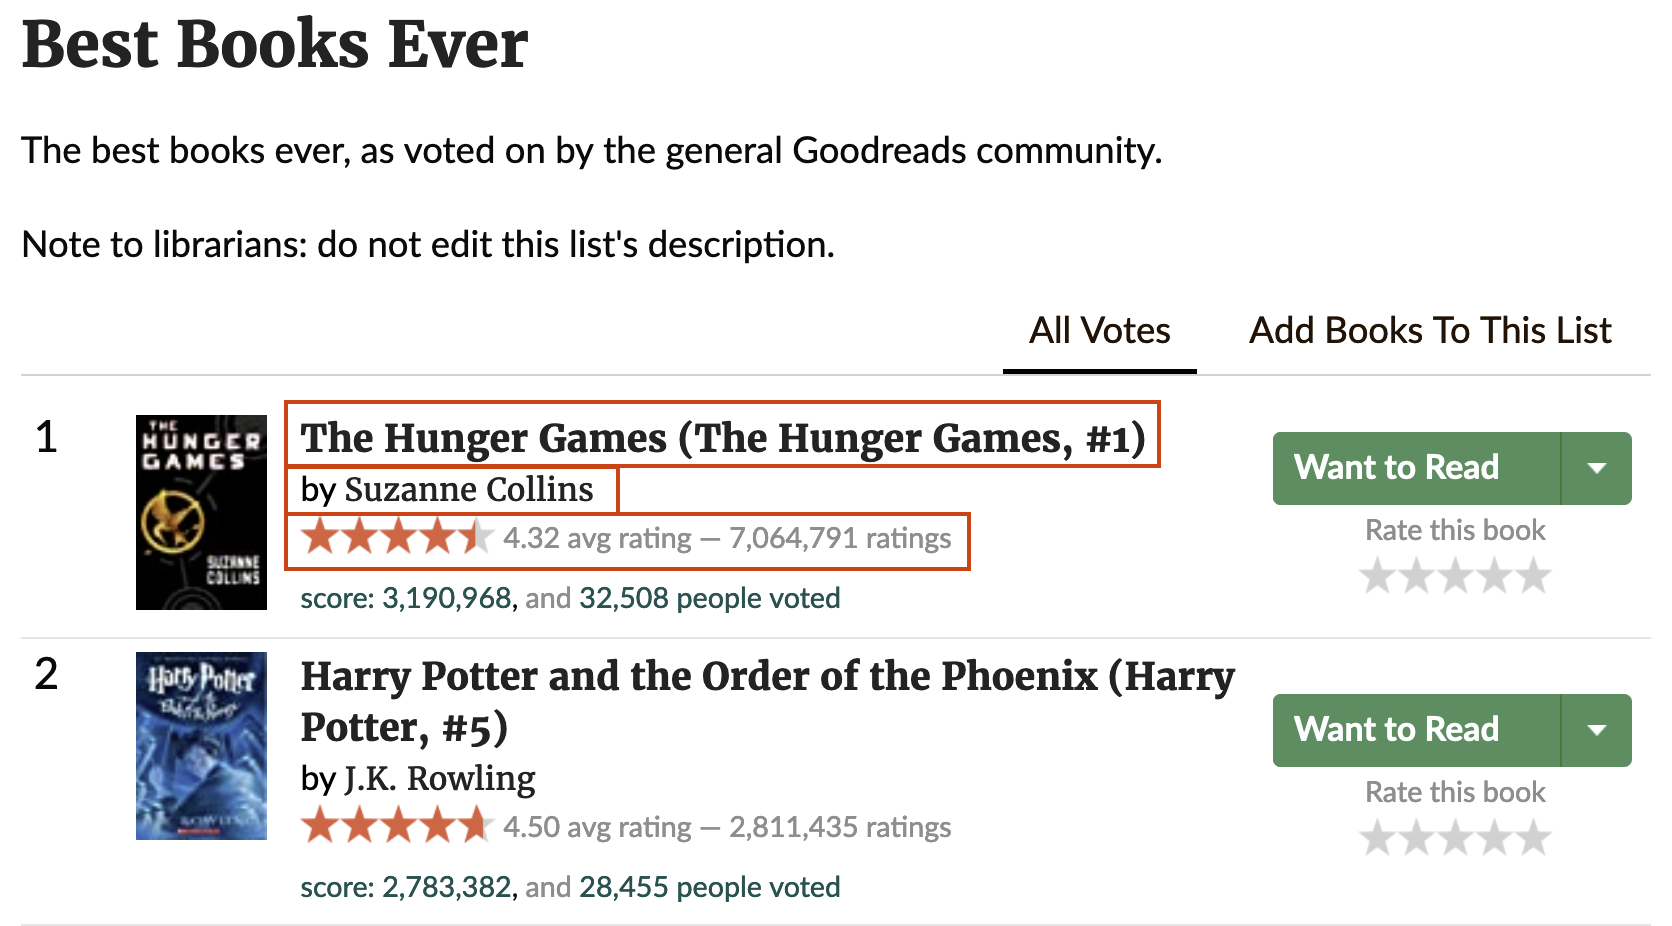

The data for this project was scraped from the website Goodreads. The specific list that was scraped was the Best Books Ever List. Each page of the list consisted of 100 books along with thier Title, Author, Number of Reviews and the Average Rating of all the reviewers (highlighted by the red boxes). For the analysis I will try to answer the the following questions with the help of data vizualization.
    1. Which books have the highest rating in the dataset?
    2. Are the Number of Reviews and the Average Rating of books related? How are they  distibuted?
    3. Which Authors have the most number of books in the Best Books Ever List?
    4. Who are the top 10 highly rated authors?

Finally I will conduct an hypothsis test to see if the average rating of all the books in this list differ from the estimated average of 4.



### Data Cleaning and Data Frame Creation

In [3]:
bookTitle = []
for ind in range(len(titles)):
    t = titles[ind]
    book = t.get_text()
    book = book.split(' (')[0]
    bookTitle.append((book.strip()))

    
bookAuthor = []
for ind in range(len(authors)):
    a = authors[ind]
    book = a.get_text()
    bookAuthor.append((book))
    
bookRating = []
bookNumReviews = []
for ind in range(len(info)):
    s = info[ind].get_text()
    s.strip(' ')

    r = s.split('—')[0].strip()
    n = s.split('—')[1].strip()
    #pub = s.split('—')[2].strip()
    if (r.split(' ')[0] == 'really'):
        r = r.split(' ')[3]
    else:
        r = r.split(' ')[0]
    n = n.split(' ')[0]
    
    bookRating.append(float(r))
    bookNumReviews.append(int(n.replace(',','')))
  

In [4]:
for ind in range(len(titles2)):
    t = titles2[ind]
    book = t.get_text()
    book = book.split(' (')[0]
    bookTitle.append((book.strip()))


for ind in range(len(authors2)):
    a = authors2[ind]
    book = a.get_text()
    #book = book.split(' (')[0]
    bookAuthor.append((book))
    

for ind in range(len(info2)):
    s = info2[ind].get_text()
    s.strip(' ')

    r = s.split('—')[0].strip()
    n = s.split('—')[1].strip()
    #pub = s.split('—')[2].strip()
    if (r.split(' ')[0] == 'really'):
        r = r.split(' ')[3]
    else:
        r = r.split(' ')[0]
    n = n.split(' ')[0]

    bookRating.append(float(r))
    bookNumReviews.append(int(n.replace(',','')))

In [5]:
books = {
    "Title": bookTitle,
    "Author": bookAuthor,
    "Rating": bookRating,
    "Number of Reviews": bookNumReviews
    #"Publication": bookPub
}

book_df = pd.DataFrame(books)
book_df

,Title,Author,Rating,Number of Reviews
0,The Hunger Games,Suzanne Collins,4.32,7064894
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,2811471
2,To Kill a Mockingbird,Harper Lee,4.27,5031876
3,Pride and Prejudice,Jane Austen,4.27,3412249
4,Twilight,Stephenie Meyer,3.62,5498106
...,...,...,...,...
195,Murder on the Orient Express,Agatha Christie,4.18,461146
196,The Clan of the Cave Bear,Jean M. Auel,4.07,244402
197,The Canterbury Tales,Geoffrey Chaucer,3.52,203544
198,The World According to Garp,John Irving,4.09,212947



I scraped the data and separated them into 3 categories Title, Author, and Info. Title and Author as the name suggests represented all the titles and authors of the books in the list. To get each specific value I had a for loop the iterated over each data instance and used string manipulations to get the final string for each. This string was then appended to a list that is used to create a data frame. Info on the other hand was not as straightforward as Title and Author. This is because Info is comprised of two separate values, Average Rating and the Number of Reviews in one information block for each book. So in the for loop that iterates over each Info instance, I had to split the string and then clean up the strings with string manipulations and then convert them into a float (Rating) and integer (# of Reviews) type. Then the two values were appended into two different lists.

For the creation of the Pandas data frame, I used the `pd.DataFrame()` function and a key-value setup for the columns and the data for each column.



### Graphs

#### Which books have the highest rating in the dataset?

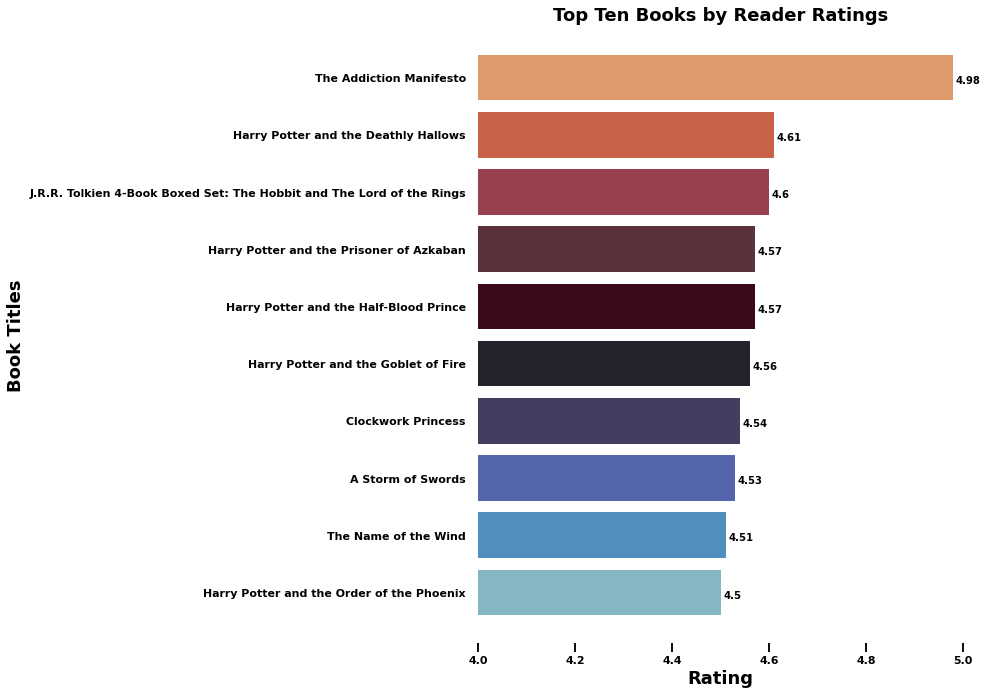

In [134]:
# Matplotlib
df = book_df.sort_values('Rating', ascending=False).head(10)
rating = df['Rating']
title = df['Title']
fig, ax = plt.subplots(figsize=(14, 10))

col = ['#DF9A6B', '#C86249','#98404E','#5B313B',
       '#3A091C','#24222B','#413E60', '#5565AD','#4F8EBD','#85B6C4']

ax.barh(title,rating, color=col)

for side in ['top', 'bottom', 'left', 'right']:
    ax.spines[side].set_visible(False)
  
ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.005, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')

plt.xlabel("Rating", fontweight='bold')
plt.ylabel("Book Titles",fontweight='bold')
plt.title("Top Ten Books by Reader Ratings", fontweight='bold')

plt.xlim(4,5)
plt.xticks(weight = 'bold',fontsize=11)
plt.yticks(weight = 'bold',fontsize=11)

plt.tight_layout()

The bar chart above displays the top 10 books with the highest average user rating from the list in Goodreads. The book with the highest overall rating is The Addiction Manifesto by Jerry Weaver which had a rating of 4.98/5. I chose to use a bar graph since the data being displayed was of a categorical nature and also beacuase it would allow me to compare the differences between the ratings of the top 10 books more easily. The y-axis lists the different books and the x-axis display the rating of each book. This plot was made using Matplotlib.

#### Are the Number of Reviews and the Average Rating of books related?

<Figure size 1224x720 with 0 Axes>

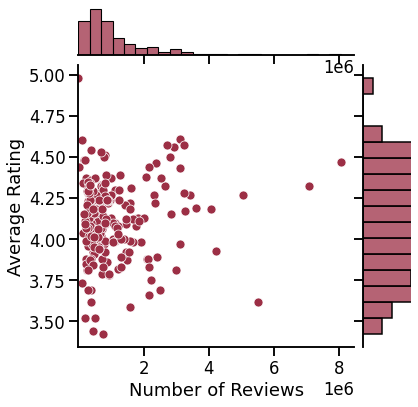

In [130]:
# Seaborn

#Checking for any relation between them.
plt.figure(figsize=(17,10))

ax =sns.jointplot(y="Rating",
                  x='Number of Reviews', 
                  kind='scatter',  
                  data= book_df[['Number of Reviews', 'Rating']],
                  color='#9c2f45')

ax.set_axis_labels("Number of Reviews", "Average Rating")
ax.ax_marg_x.set_xlim(0.5)
plt.xlim(0,5)
plt.show()


Above we have a jointplot, this plot depicts how the avergage rating of a book varies with the number of reviews a book has. The marginal plots depict the distribution of each variable, i.e. Avergage Rating and the Number of Reviews of books in the dataset. We can see by looking at the marginal plots that the variable 'Number of Reviews' is heavily skewed to the right whereas 'Average Rating' appears to be normally distibuted with a possibility of one outlier. The main plot shows us that there is not much of a association between the variables since the points seem to be clustered along the y-axis. Thus there is no realtion between the Average Rating of a book and the Number of Reviews it has.

#### Who are the top ten authors with most books on the Best Books Ever List on Goodreads?

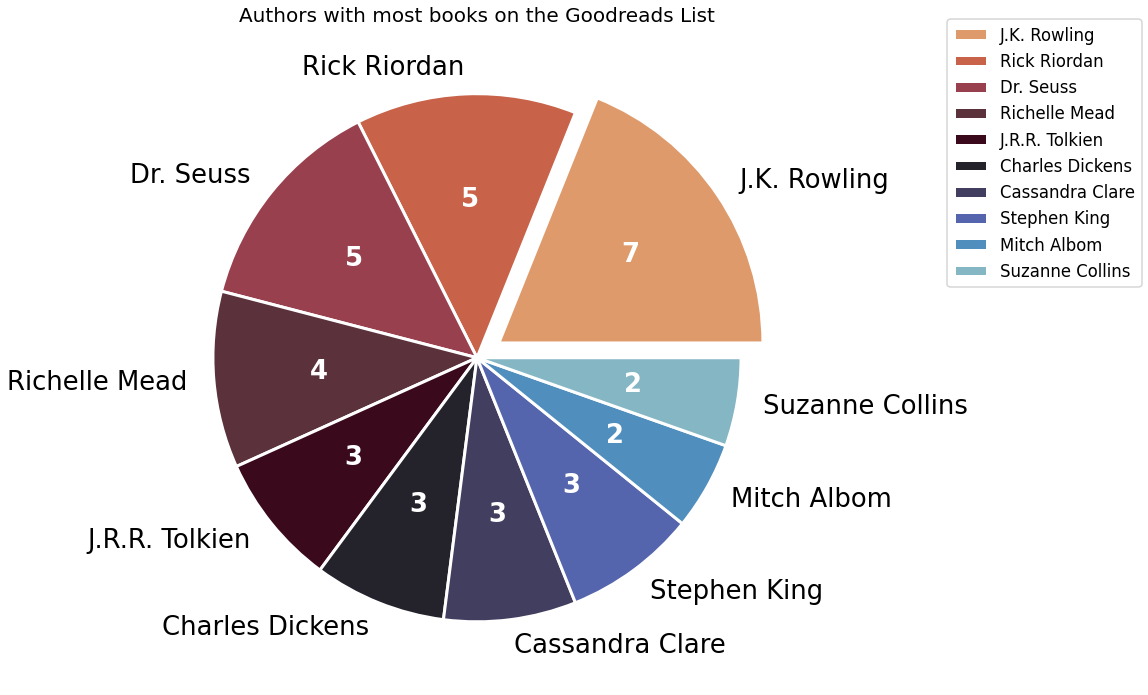

In [127]:
# Who are the authors with most books on the goodreads list
# matplotlib
most_books = book_df.groupby('Author')['Title'].count().reset_index().sort_values('Title', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(17,10))

col = ['#DF9A6B', '#C86249','#98404E','#5B313B',
       '#3A091C','#24222B','#413E60', '#5565AD','#4F8EBD','#85B6C4']
ex = [0.1, 0, 0, 0, 0, 0, 0, 0, 0,0]

# change percent to number
def form(values):
    def text_change(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return text_change

patches, texts, pcts = ax.pie(
    most_books['Title'], 
    labels=most_books['Author'],
    colors=col, 
    explode = ex,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    autopct=form(most_books['Title']),
    textprops={'size': 'x-large'})

plt.setp(pcts, color='white', fontweight='bold') # change text color to white
ax.set_title('Authors with most books on the Goodreads List', fontsize=20)
plt.legend(bbox_to_anchor=(1.2, 1.025), loc = "upper left")
plt.tight_layout()



The plot above is a pie chart where each slice represent the number of books an author has in the book list. The top ten authors with the most books is depicted in this plot. From the plot we can infer that J.K. Rowling has the most number of books in the list with a total of 7 books. To get the data for this pie chart I first grouped the dataframe by Authors and then found the count of each authors book in the dataframe. This plot was made using matplotlib and the legned on the right shows which colored sector belongs to which author. 

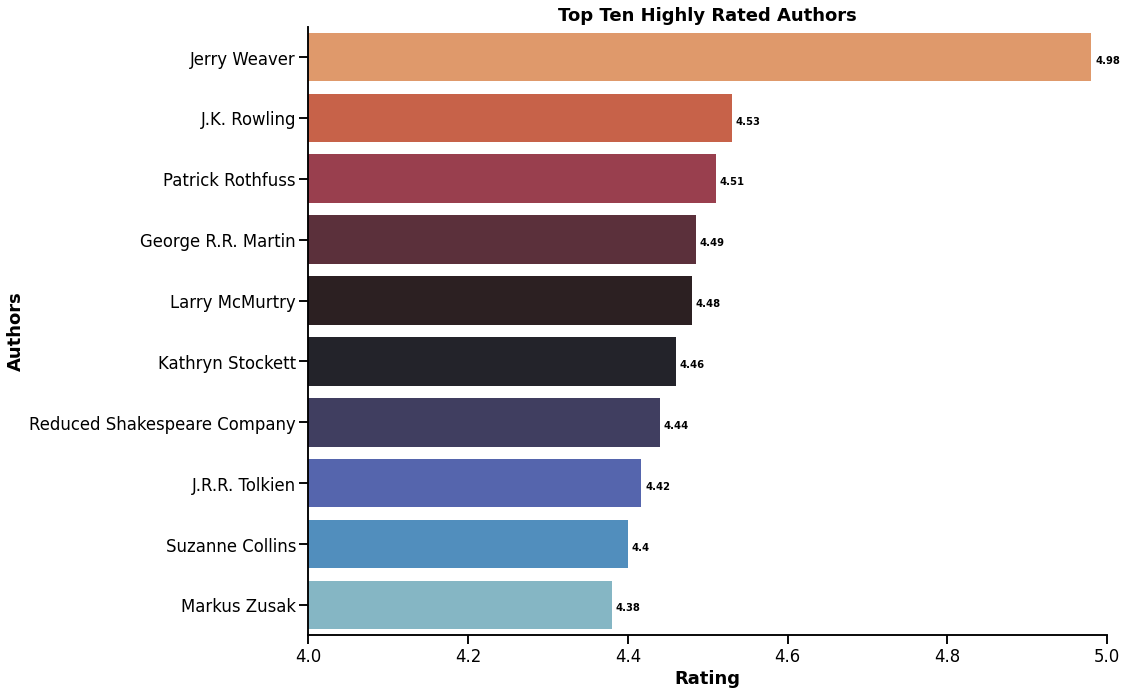

In [128]:
# Who are the top 10 highly rated authors?

high = book_df.groupby('Author')['Rating'].mean().reset_index().sort_values('Rating', ascending=False).head(10).set_index('Author')

fig, ax = plt.subplots(figsize=(16, 10))

ax = sns.barplot(x=high['Rating'], 
                 y=high.index, 
                 palette='icefire_r')

ax.set_title("Authors with most books in the List")
ax.set_xlabel("Total number of books")
    
for i in ax.patches:
    plt.text(i.get_width()+0.005, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.xlabel("Rating", fontweight='bold')
plt.ylabel("Authors",fontweight='bold')
plt.title("Top Ten Highly Rated Authors", fontweight='bold')
plt.xlim(4,5)
plt.tight_layout()

This bar graph helps us visualize which Authors in the data set have the highest average rating. This plot was achieved by first grouping the initial datframe by authors and then finding the average of their book ratings in the list and then the top ten authors with the highest ratings were selected to be displayed. 

### Statistical Analysis
One-Sample T-Test: 

Assumptions:

We are assuming that our population is normally distributed, since the distribution of Ratings from the joint plot above was fairly normal and the sample size = 200 which is greater than 30, thus the Central Limit Theorem applies. 

(i) &nbsp;  H<sub>o</sub>: $\mu$ = 4 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;         H<sub>a</sub>: $\mu$ $\ne$ 4

The null hypothesis H<sub>o</sub> states that the estimated population parameter of the average rating of books in the list on Goodreads is 4.

The alternative hypothesis H<sub>a</sub> states that the population parameter does not equal the null hypothesis value, which is that the mean rating of books on the Goodreads List differs from 4

(ii) Find the test statistic:

t<sub>obs</sub> = $\frac{(\bar{x} - \mu)} {( \frac{s_x}{√n} )}$


Since the population variance is unknown the appropriate hypothesis test for this case is the T test.

 


In [82]:
xbar = book_df['Rating'].mean() # 4.11945
s = book_df['Rating'].std()     # 0.23891
n = book_df['Rating'].count()   # 200
df = n-1

# test statistic T
tob = (xbar - 4)/(s/(n**(1/2)))
tob

7.070734530690309

In [87]:
# Two-tailed test
scipy.stats.t.sf(abs(tob), df=n-1)*2 # p-value


2.554159103275538e-11

We reject the null hypothesis as the calculated p-value = 2.554e-11 is lesser than the chosen alpha of 0.05. This means that the hypothesis test was significant and there is sufficient evidence in the sample to suggest that the mean value of the Average Rating Score of books in the list differs from the estimated population mean of 4.